# PROYECTO BIG DATA PARA LA OPTIMIZACIÓN DE RECLAMOS

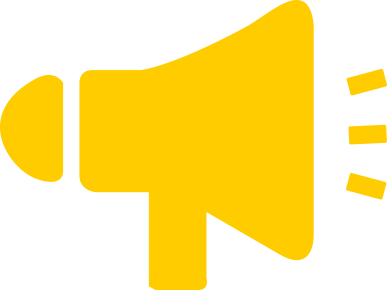

# Integrantes:

### Juan Jose Soto Cruz
### Yuri Vanessa Ccencho Atauje
### Jose Berrocal Bensur

## 1. Caso de Negocio
El caso de negocio es sobre las quejas del consumidor sobre productos y servicios financieros que se centralizan por la oficina de protección financiera del consumidor.El objetivo del proyecto es poder diseñar una infraestructura que soporte el uso de Big Data para el análisis de información y así establecer recomendaciones a las entidades financieras para mejorar su funcionamiento y ofrecer mejores experiencias a los usuarios y a los consumidores a detectar tendencias de actos injustos o engañosos para evitar problemas por adelantado.

## 2. Justificación
Proponer una solución para el análisis de datos. Los datos por más volumen, variedad que puedan ser tener, si no se analizan no resultan útiles para las recomendaciones y toma de decisiones. Lo que se busca en primera instancia es centralizar esos datos para su extracción desde diferentes fuentes, para realizar su almacenamiento, procesamiento y análisis.
#### Volumen:
Gran cantidad de datos generados diariamente producto de las quejas de los usuarios de todo el sistema financiero de un pais.
#### Velocidad: 
Se requiere mejoras en el tiempo de ingesta de información, a fin de reducir los tiempos de espera para el análisis de información oportuna.
#### Variedad:
Se manejan diversas variables de data, así como múltiples fuentes input de información.


# 3. Identificación y Clasificación de Fuentes

La información utilizada en el presente trabajo, se basa en fuente de datos externa de bancos americanos donde proporcionan las quejas de consumidores y respuesta de la empres al consumidor, así como datos adicionales como empresa, estado, fecha de recepción, vía de presentación de la queja, entre otros datos.
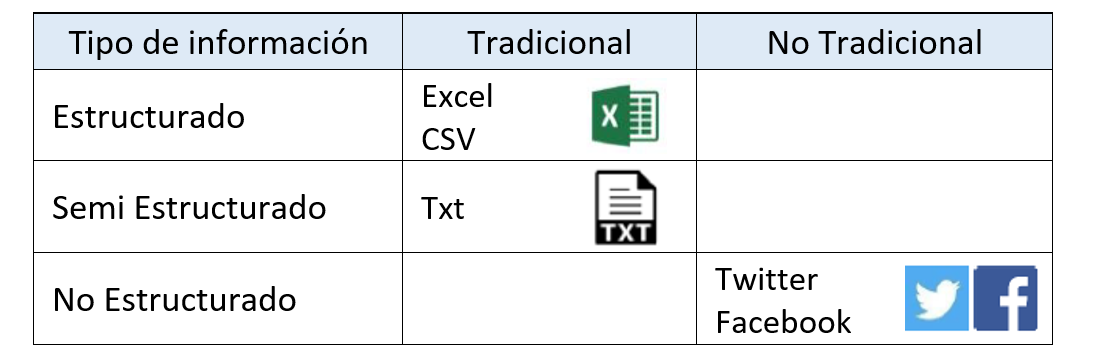

# 4.Sizing de la Generación de Data

La Oficina de Protección Financiera del Consumidor (CFPB) es la primera agencia federal enfocada exclusivamente en protección financiera de los consumidores, y las quejas de los consumidores son una parte esencial de este trabajo.
En tal sentido hemos determinado el crecimiento de la data, basándonos en indicadores de medición, el cual visualizamos en el siguiente cuadro.

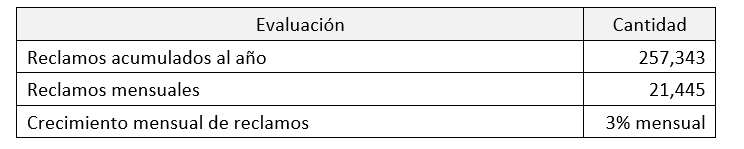

# 5.Diseño de arquitectura conceptual
El modelo conceptual considera cinco componentes funcionales conectados por interfaces:
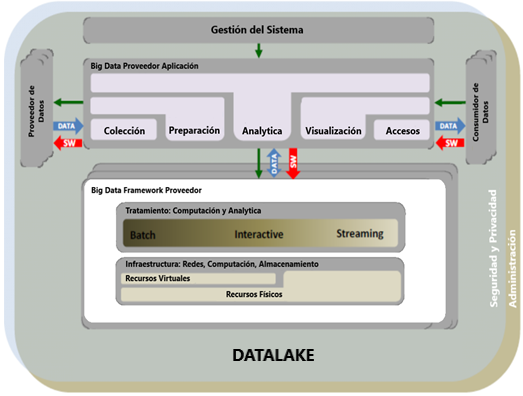

# 6.Diseño De Arquitectura Tecnológica

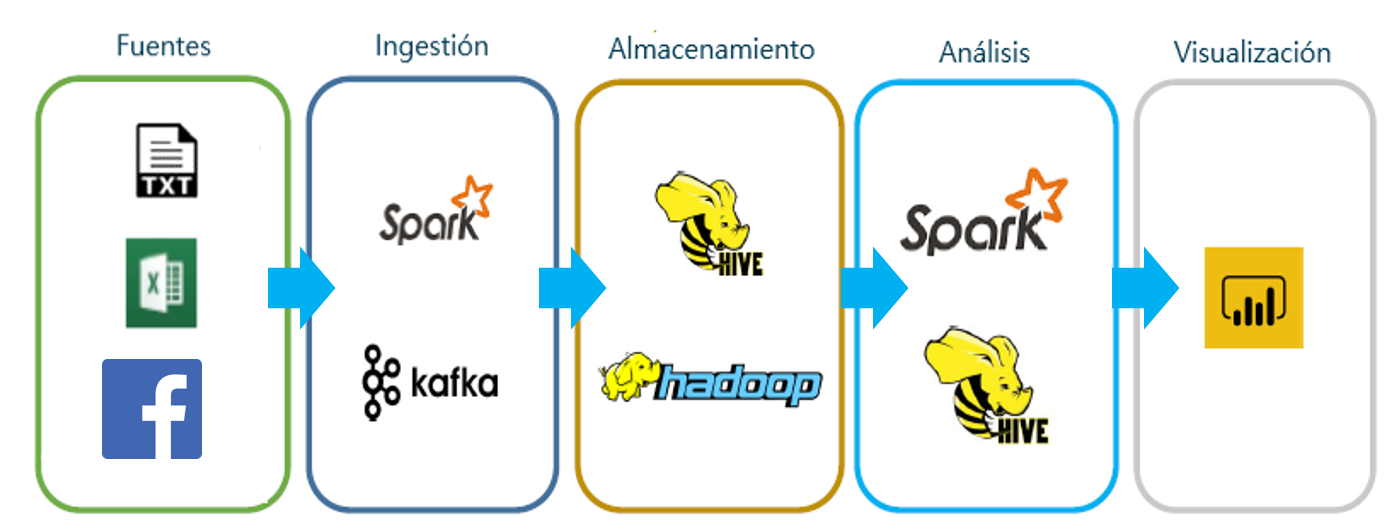

# 7.1Perfiles de Bigdata 
Los roles determinados que participaran en las siguientes fases del proyecto, se visualiza en la siguiente imagen:

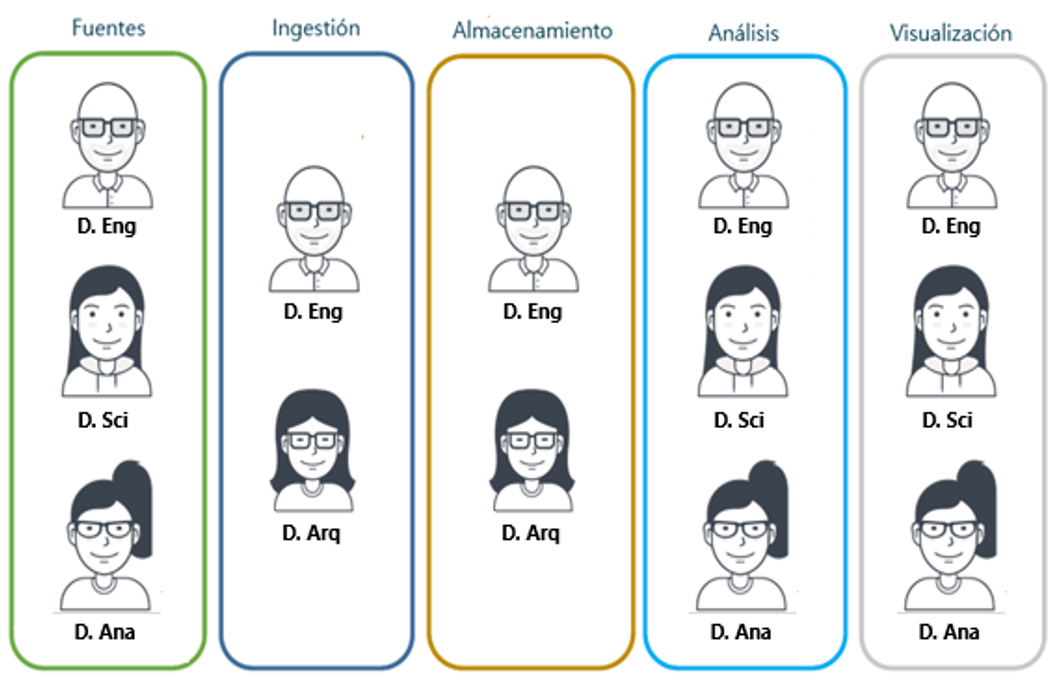

# 7.2 Presupuesto Del Proyecto
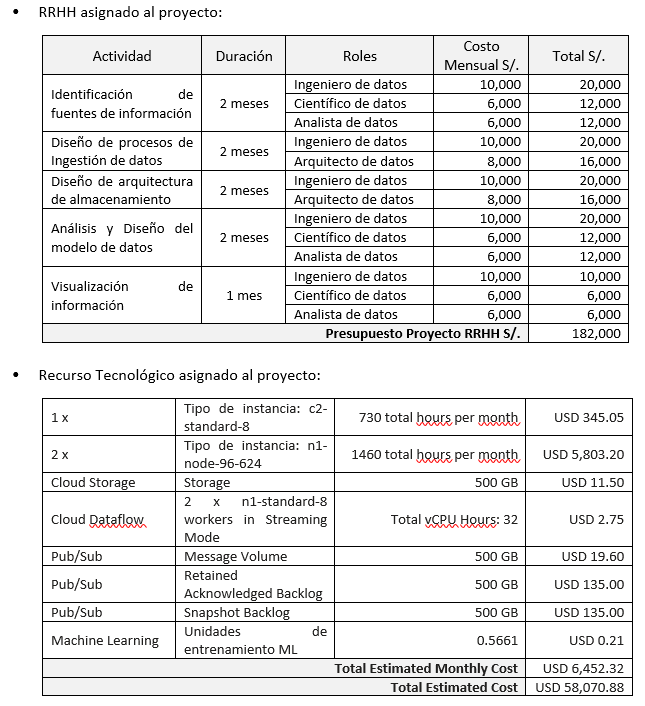

COSTO TOTAL DEL PROYECTO (expresado en dólares americanos): USD 108,626

# 8Tramiento de datos en un Datalake

Dentro del proyecto tenemos definifos 3 capas de datalake

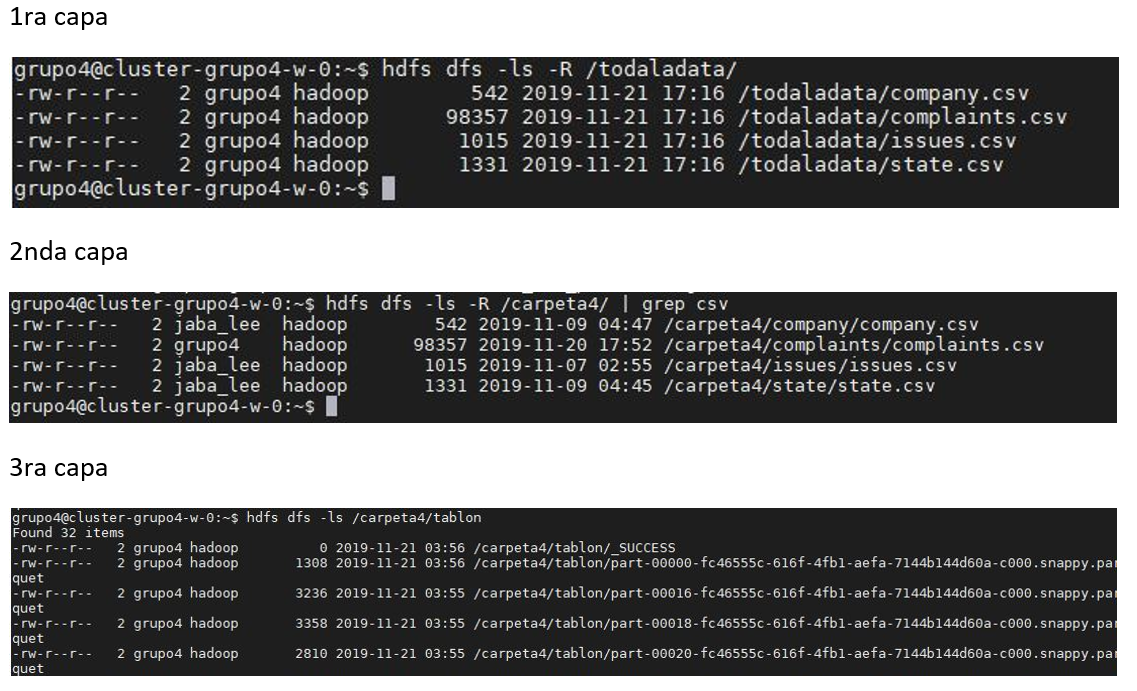
 

Comandos usados para la creación de las 2 primeras capas
hdfs dfs -mkdir /todaladata/

hdfs dfs -put state.csv /todaladata/
hdfs dfs -put company.csv /todaladata/
hdfs dfs -put issues.csv /todaladata/
hdfs dfs -put complaints.csv /todaladata/

hdfs dfs -cp /todaladata/state.csv /carpeta4/state/
hdfs dfs -cp /todaladata/company.csv /carpeta4/company/
hdfs dfs -cp /todaladata/issues.csv /carpeta4/issues/
hdfs dfs -cp /todaladata/complaints.csv /carpeta4/complaints/


Las carpetas de las 2da capa fueron creados al momento de crear las tablas

Nos conectamos y creamos la Base de Datos en Hive:

-- beeline -u jdbc:hive2://10.128.0.9:10000/   
-- create database trabajo4;



#### 8.1	Crear tablas en hive (simple, bucketing, partición dinámica y estática)
------------------------------------------------------
CREATE EXTERNAL TABLE IF NOT EXISTS trabajo4.issues(
id_issue string COMMENT 'Id_issue',
issues string COMMENT 'Issues'
)
COMMENT 'Tabla Issues'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '/carpeta4/issues'
tblproperties("skip.header.line.count" = "1");

-------------------------------------------------------

use trabajo4;
CREATE EXTERNAL TABLE IF NOT EXISTS trabajo4.complaints(
date_received date COMMENT 'Date_received',
id_issue string COMMENT 'Id_issue',
id_company string COMMENT 'Id_company',
id_state string COMMENT 'Id_state',
consumer_consent_provided string COMMENT 'Consumer_consent_provided',
submitted_via string COMMENT 'Submitted_via',
date_sent_to_company date COMMENT 'Date_sent_to_company',
company_response_to_consumer string COMMENT 'Company_response_to_consumer',
timely_response string COMMENT 'Timely_response'
)
COMMENT 'Tabla Complaints'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '/carpeta4/complaints'
tblproperties("skip.header.line.count" = "1");

------------------------------------------------------

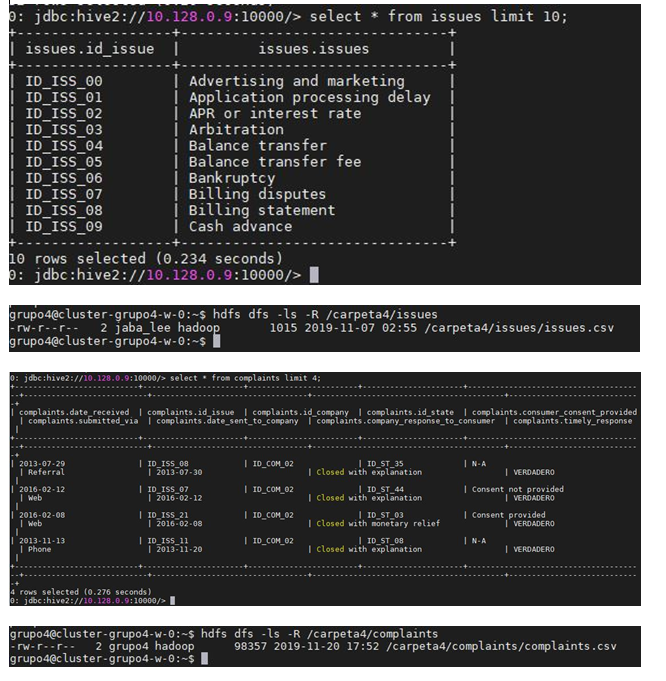


#### 8.2	Crear tablas en hive (compleja: array, struct, map)
-------------------------------------------------------
use trabajo4;
CREATE EXTERNAL TABLE IF NOT EXISTS trabajo4.company(
id_company string COMMENT 'Id_company',
company_name string COMMENT 'Company_name',
id_company_company_name struct<id_company:STRING,company_name:string> COMMENT 'Id_company_company_name'
)
COMMENT 'Tabla Company'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '|'
COLLECTION ITEMS TERMINATED BY ','
MAP KEYS TERMINATED BY ':'
LOCATION '/carpeta4/company'
tblproperties("skip.header.line.count" = "1");

------------------------------------------------

use trabajo4;
CREATE EXTERNAL TABLE IF NOT EXISTS trabajo4.state(
id_state string COMMENT 'Id_state',
state string COMMENT 'State',
id_state_state struct<id_state:STRING,state:string> COMMENT 'Id_state_state'
)
COMMENT 'Tabla State'
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '|'
COLLECTION ITEMS TERMINATED BY ','
MAP KEYS TERMINATED BY ':'
LOCATION '/carpeta4/state'
tblproperties("skip.header.line.count" = "1");

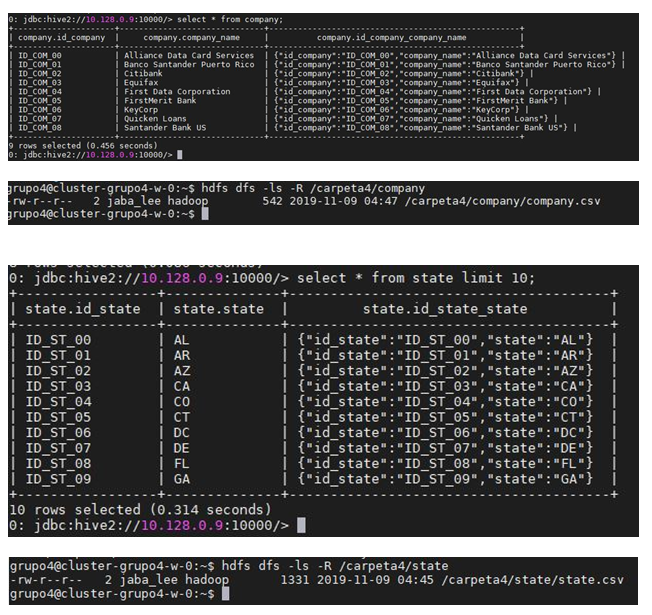


#### 8.3	Tabla estática y función de Ingesta
-------------------------------------------------------
CREATE EXTERNAL TABLE trabajo4.tabla_particion_estatica
(
   date_received date COMMENT 'Date_received',
   id_issue string COMMENT 'Id_issue',
   id_company string COMMENT 'Id_company',
   id_state string COMMENT 'Id_state',
   consumer_consent_provided string COMMENT 'Consumer_consent_provided',
   submitted_via string COMMENT 'Submitted_via',
   date_sent_to_company date COMMENT 'Date_sent_to_company',
   company_response_to_consumer string COMMENT 'Company_response_to_consumer',
   timely_response string COMMENT 'Timely_response'
)
PARTITIONED BY (mensual STRING)
STORED AS PARQUET
LOCATION '/carpeta4/complaints_part_esta/tabla_particion_estatica';

-------------------------------------------------------------

insert into trabajo4.tabla_particion_estatica partition(mensual = '201211')
select 
from_unixtime (unix_timestamp(Concat(substring(date_received,1,4),SUBSTRING(date_received,5,2), SUBSTRING(date_received,7,2)), 'yyyyMMdd'), 'yyyy-MM-dd') as date_received,
id_issue, 
id_company, 
id_state, 
consumer_consent_provided, 
submitted_via, 
from_unixtime (unix_timestamp(Concat(substring(date_sent_to_company,1,4),SUBSTRING(date_sent_to_company,5,2), SUBSTRING(date_sent_to_company,7,2)), 'yyyyMMdd'), 'yyyy-MM-dd') as date_sent_to_company,
company_response_to_consumer, 
timely_response 
from trabajo4.complaints where date_received like '2012-11-%';

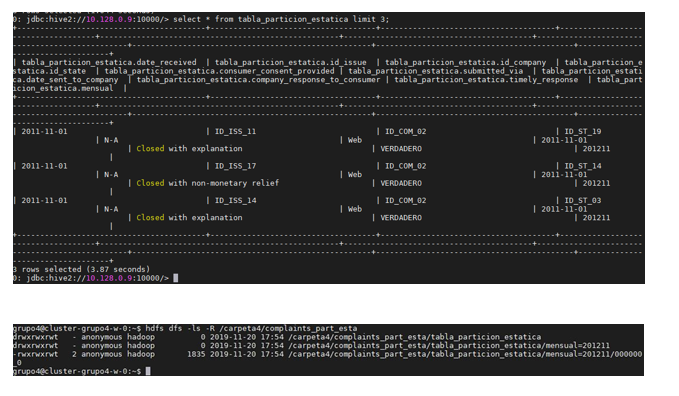



#### 8.4	Tabla Dínamica y función de Ingesta
CREATE EXTERNAL TABLE trabajo4.tabla_particion_dinamica
(
   id_issue string COMMENT 'Id_issue',
   id_company string COMMENT 'Id_company',
   id_state string COMMENT 'Id_state',
   consumer_consent_provided string COMMENT 'Consumer_consent_provided',
   submitted_via string COMMENT 'Submitted_via',
   date_sent_to_company date COMMENT 'Date_sent_to_company',
   company_response_to_consumer string COMMENT 'Company_response_to_consumer',
   timely_response string COMMENT 'Timely_response'
)
PARTITIONED BY (date_received STRING)
STORED AS PARQUET
LOCATION '/carpeta4/complaints_part_dina/tabla_particion_dinamica';


set hive.exec.dynamic.partition.mode=nonstrict;


insert into trabajo4.tabla_particion_dinamica partition(date_received)
select 
id_issue, 
id_company, 
id_state, 
consumer_consent_provided, 
submitted_via, 
from_unixtime (unix_timestamp(Concat(substring(date_sent_to_company,1,4),SUBSTRING(date_sent_to_company,5,2), SUBSTRING(date_sent_to_company,7,2)), 'yyyyMMdd'), 'yyyy-MM-dd') as date_sent_to_company,
company_response_to_consumer, 
timely_response,
from_unixtime (unix_timestamp(Concat(substring(date_received,1,4),SUBSTRING(date_received,5,2), SUBSTRING(date_received,7,2)), 'yyyyMMdd'), 'yyyy-MM-dd') as date_received
from trabajo4.complaints where date_received like '2012-0%';

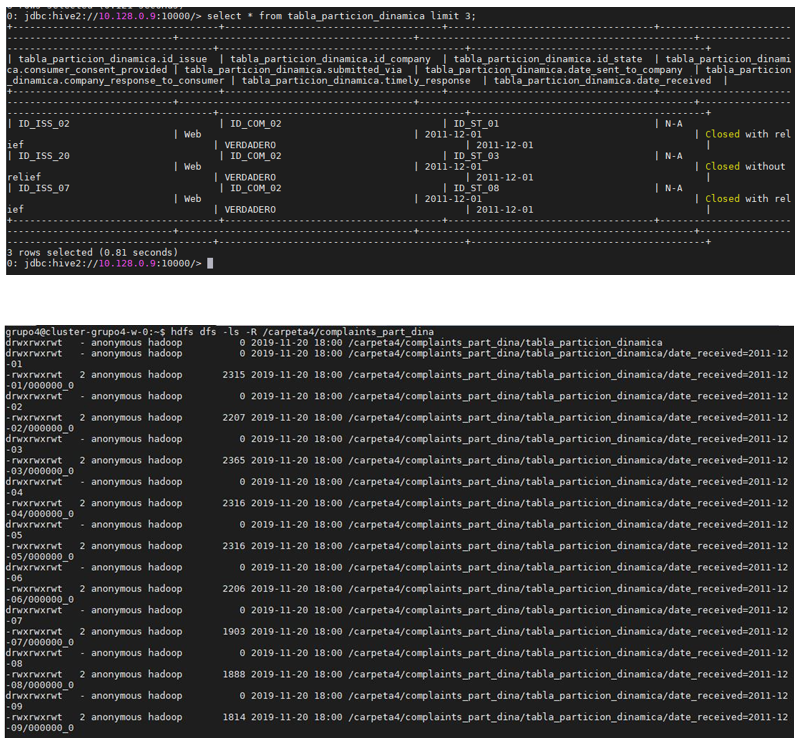


#### 8.5	Bucking
CREATE EXTERNAL TABLE IF NOT EXISTS trabajo4.company_buckets (
id_company string COMMENT 'Id_company',
company_name string COMMENT 'Company_name',
id_company_company_name struct<id_company:STRING,company_name:string> COMMENT 'Id_company_company_name'
)
CLUSTERED BY (company_name) INTO 2 BUCKETS
ROW FORMAT DELIMITED
FIELDS TERMINATED BY '|'
COLLECTION ITEMS TERMINATED BY ','
MAP KEYS TERMINATED BY ':'
LOCATION '/carpeta4/company_buck/tabla_bucketing';

set map.reduce.tasks = 2;
set hive.enforce.bucketing = true;
INSERT OVERWRITE TABLE trabajo4.company_buckets SELECT * FROM trabajo4.company;


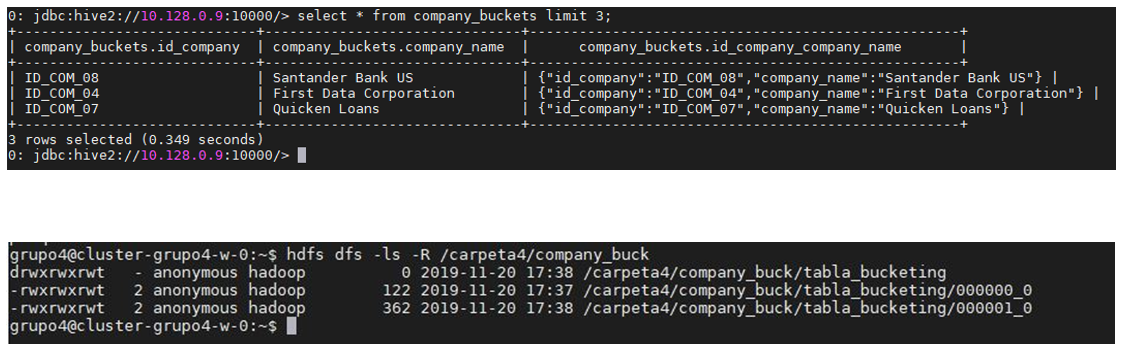


#### 8.6 Transformaciones con Spark

Procedemos a pasar las tablas a data frames


val df_state = spark.read.table("trabajo4.state")
df_state.show() 
df_state.printSchema() 

val df_issues = spark.read.table("trabajo4.issues")
df_issues.show() 
df_issues.printSchema() 

val df_complaints = spark.read.table("trabajo4.complaints")
df_complaints.show() 
df_complaints.printSchema() 

val df_company = spark.read.table("trabajo4.company")
df_company.show() 
df_company.printSchema()

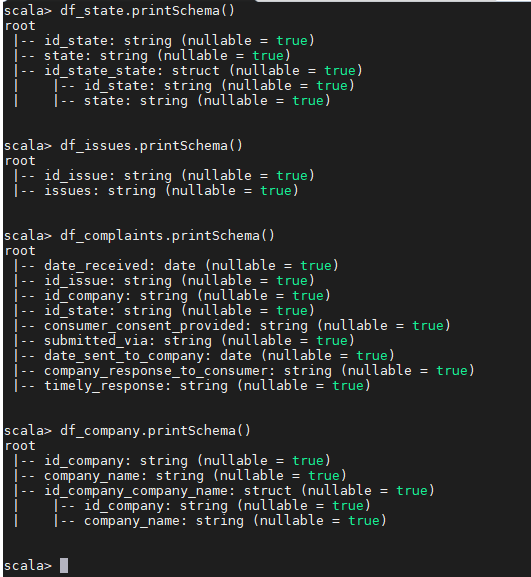


####  DataFrame Consolidada
val df_tablon =df_complaints.as("cot").join(df_issues.as("iss"),"id_issue").join(df_state.as("sta"),"id_state").join(df_company.as("coy"),"id_company").select("cot.date_received","iss.issues","coy.company_name","sta.state","cot.consumer_consent_provided","cot.submitted_via","cot.date_sent_to_company","cot.company_response_to_consumer","cot.timely_response")


df_tablon.show()
df_tablon.printSchema()

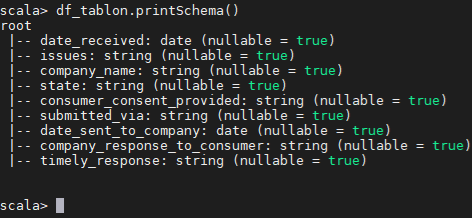

Guardamos el dataframe en parquet y creamos una tabla con la data a analizar

df_tablon.write.format("parquet").save("/carpeta4/tablon/")
df_tablon.createOrReplaceTempView("tablon");
spark.sql("create table if not exists trabajo4.tablon as select * from tablon");


La “/carpeta4/tablon/" es la tercera capa del datalake que se generará



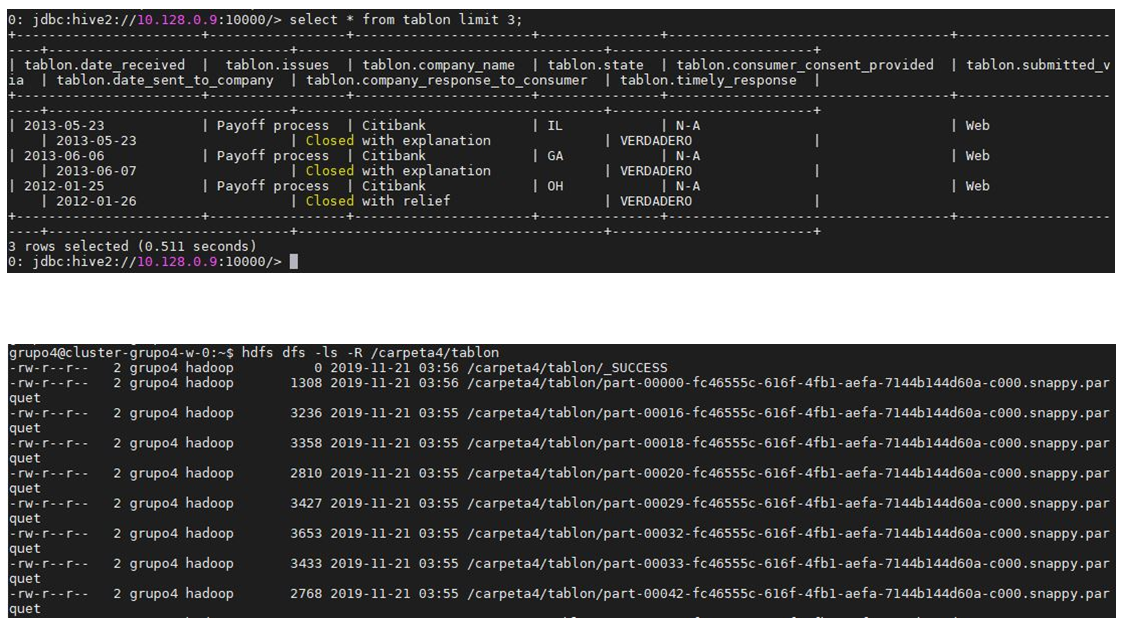

#### 8.7. Transformaciones con UDFs

###### COPIAMOS EL CONTENIDO DE UNA TABLA Y LO CONVERTIMOS EN DATAFRAME
val df_tablon_udf = spark.read.table("trabajo4.tablon");

df_tablon_udf.show(1)
df_tablon_udf.printSchema()

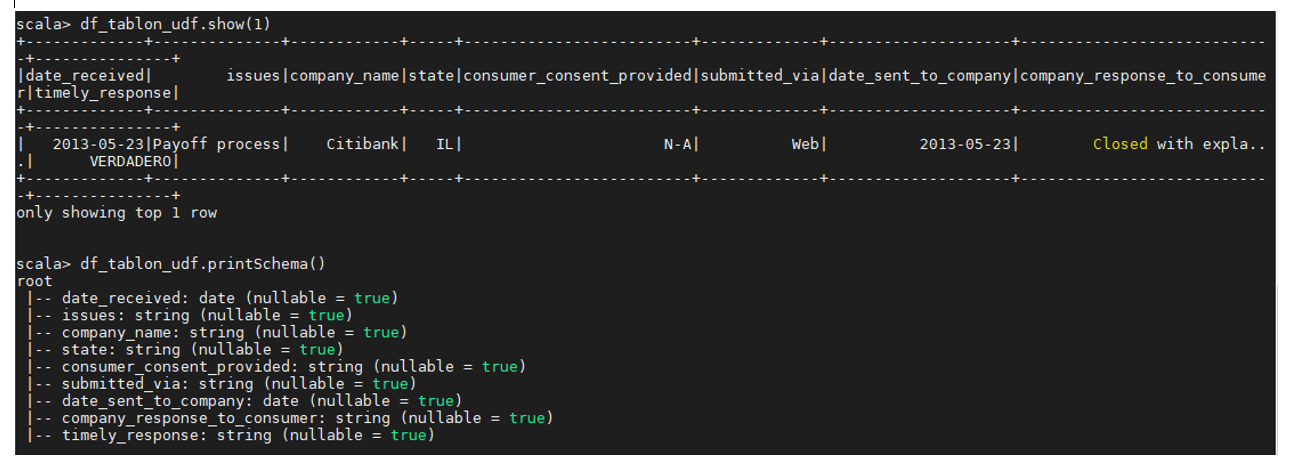


###### CREAMOS LA FUNCIÓN
val upper: String => String = _.toUpperCase

###### PASAMOS LA FUNCIÓN A UDF
import org.apache.spark.sql.functions.udf
val upperUDF = udf(upper)


###### EJECUTAMOS LA FUNCION EN EL DATAFRAME
val df_tablon_udf_post = df_tablon_udf.withColumn("upper", upperUDF('issues))

df_tablon_udf_post.createOrReplaceTempView("tablon_udf");
spark.sql("create table if not exists trabajo4.tablon_udf as select * from tablon_udf");
df_tablon_udf_post.write.format("parquet").save("/carpeta4/tablon_udf/")

spark.sql("""SELECT * from trabajo4.tablon_udf""").show(1)
spark.sql("""SELECT * from trabajo4.tablon_udf""").printSchema()

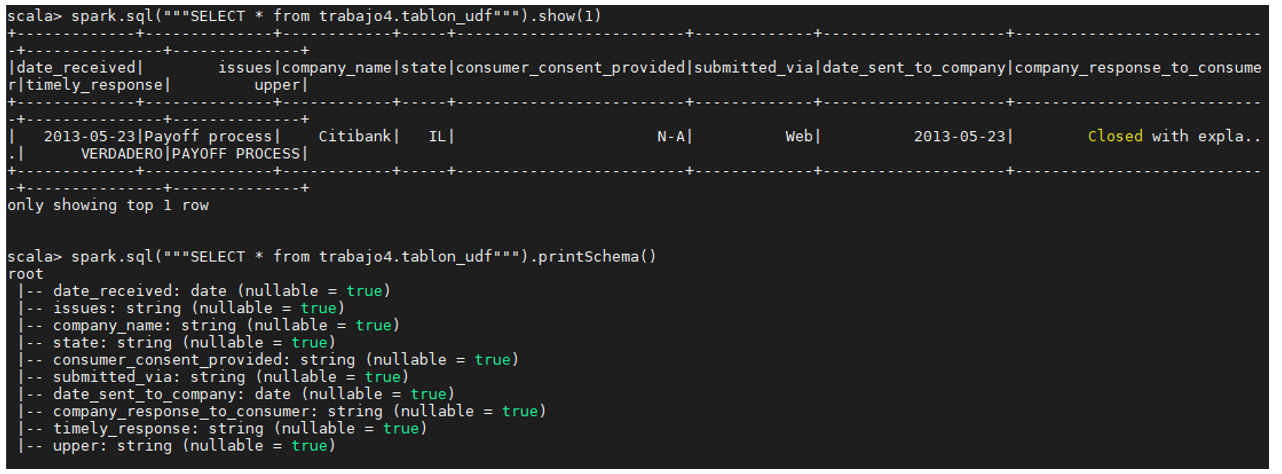


#### 8.8. Tablas en HBASE

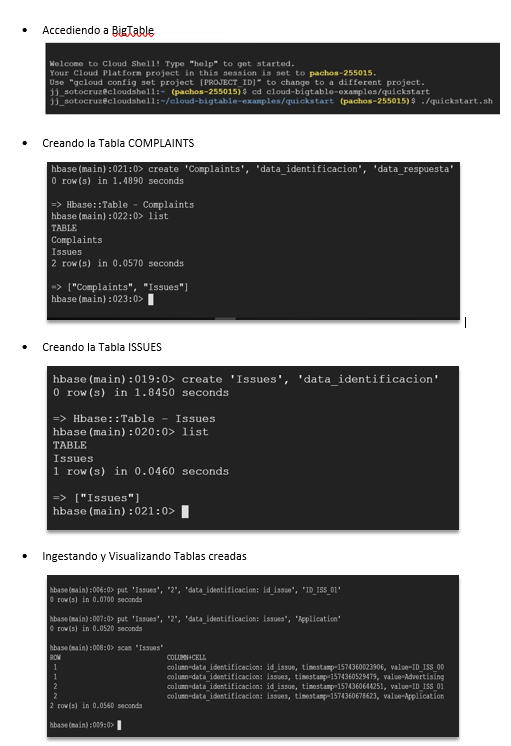


# 9.Apache Kafka



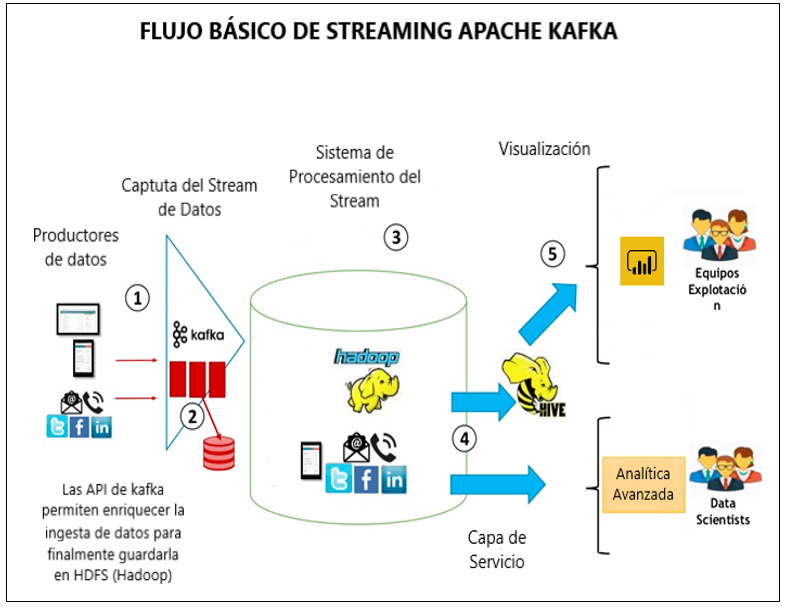


# 9.1 Explicar el Funcionamiento del Flujo en Streaming

Apache Kafka es un sistema de mensajes distribuidos de código abierto que permite crear aplicaciones en tiempo real con datos de transmisiones. Puede enviar datos de transmisiones como secuencias de clics de sitios web, transacciones financieras y registros de aplicación a su clúster de Kafka, el cual almacena los datos en búfer y los envía a aplicaciones de procesamiento de transmisiones creadas en marcos como Apache Spark Streaming, Apache Storm o Apache Samza.

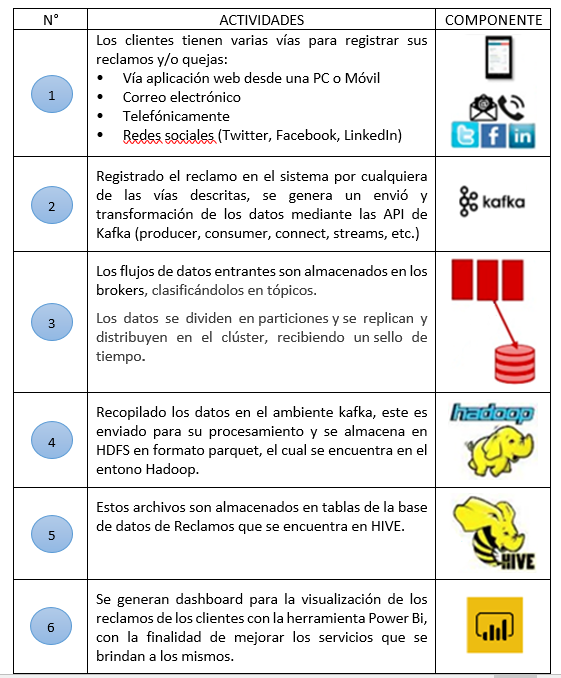

# 10. Visualización

Conexión con Power BI

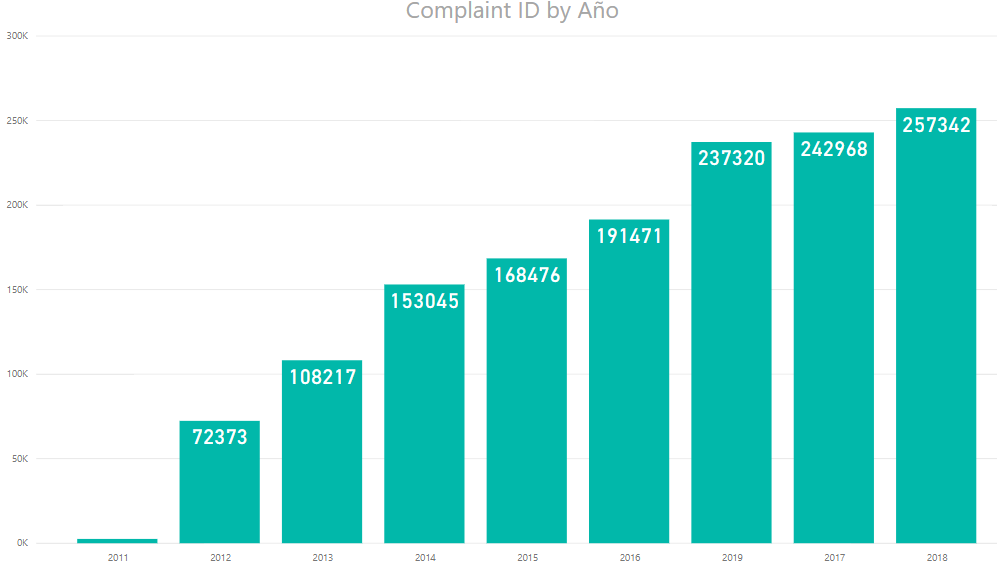


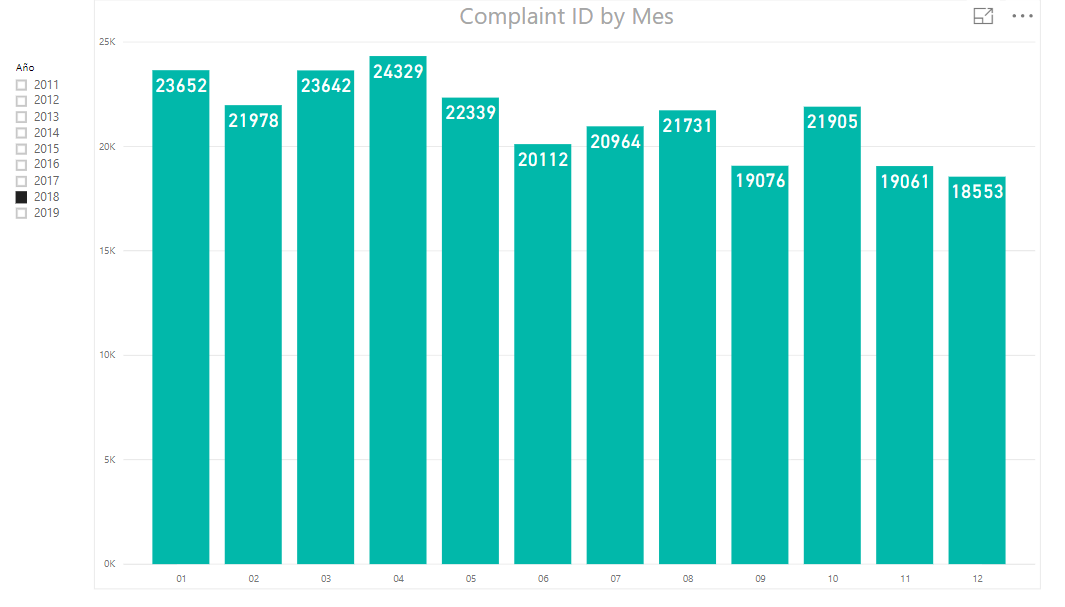

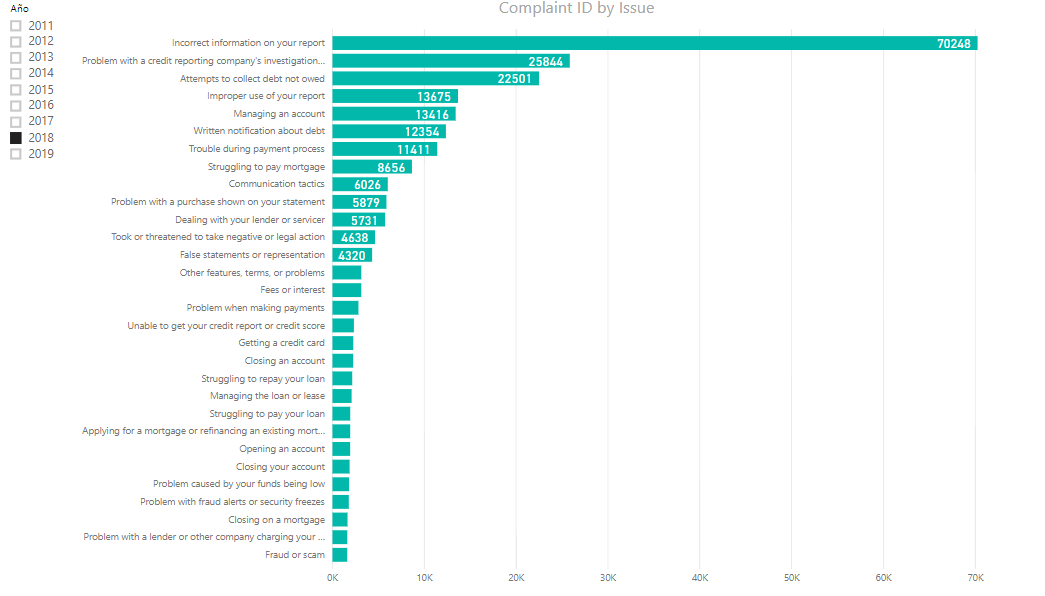

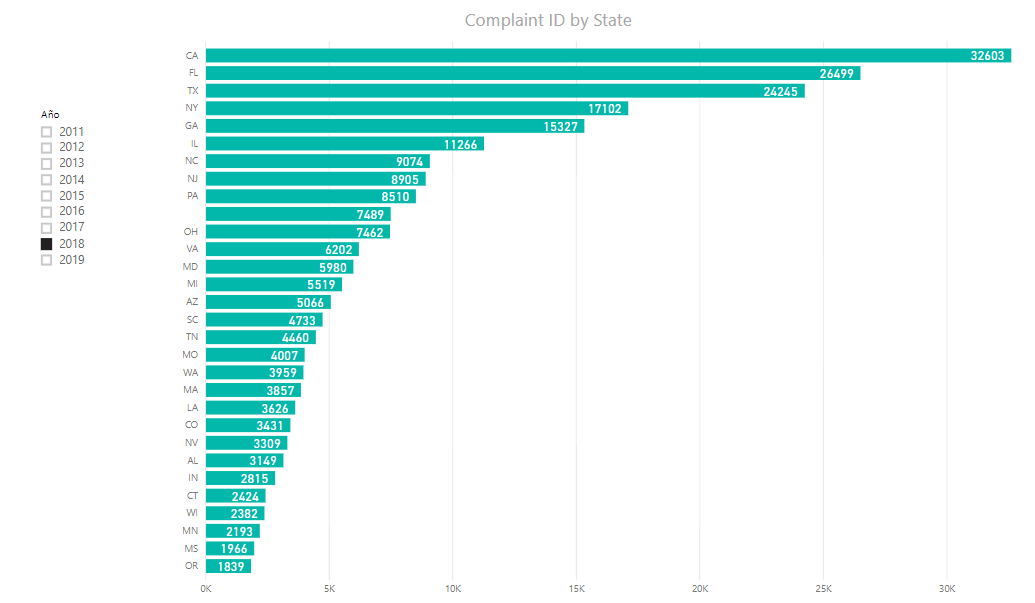

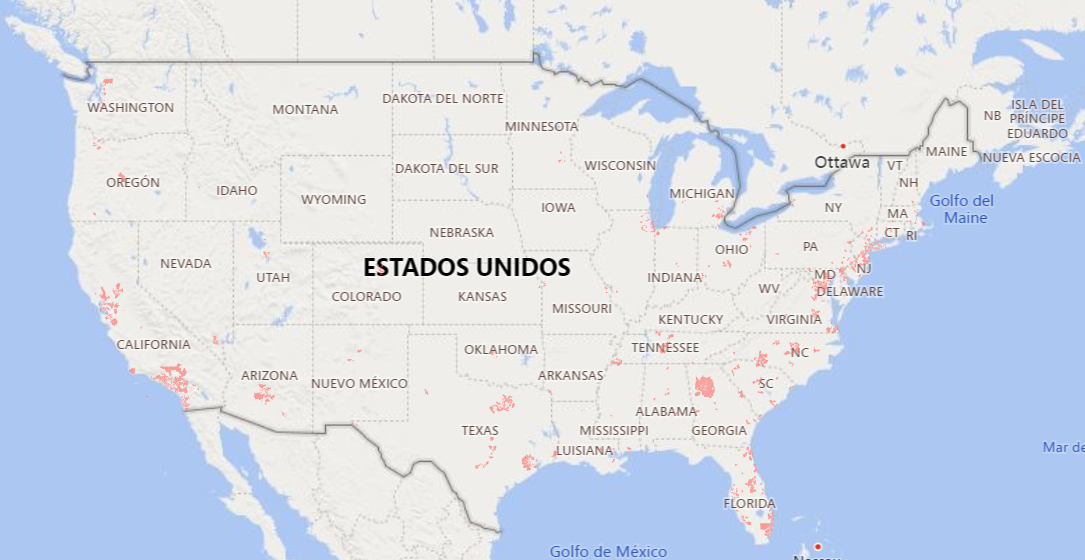

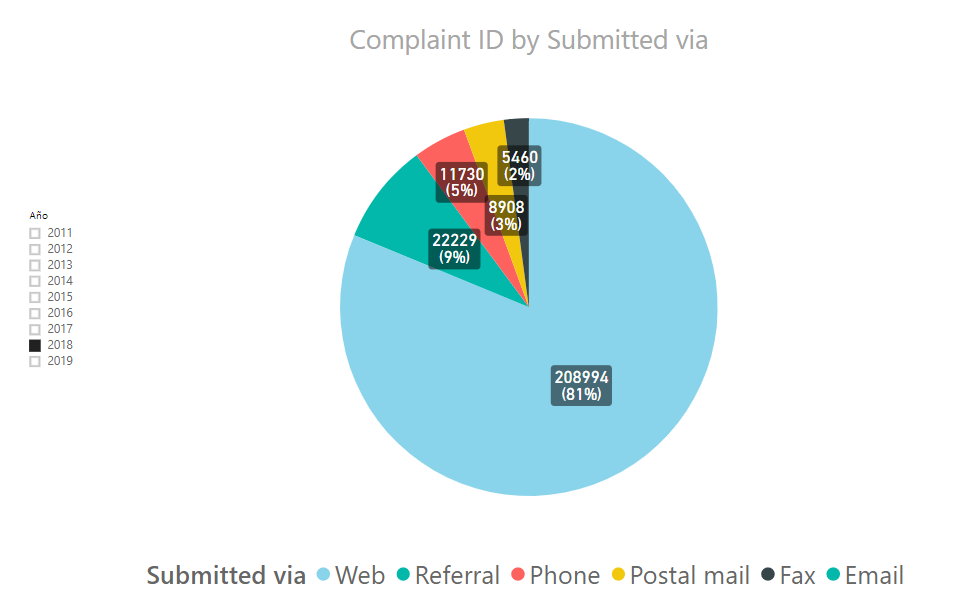

# 11. Modelo de Machine Learning en Spark



parte_de_ML

##### EN CASO QUE LA EL TABLON TENGA LA DATA CORRECTA PODRIAN EJECUTARSE LOS SIGUIENTES COMANDOS



##### SE LEE LA DATA

val df_ml_tablon = spark.read.table("trabajo4.tablon")

##### SE GENERA EL VECTOR

feature_columns = df_ml_tablon.columns[:-1] #se quita la última fila

from pyspark.ml.feature import VectorAssembler

assembler_ml = VectorAssembler(inputCols=feature_columns,outputCol="features") #Nombre de la columna de salida es features
df_ml_tablon_2 = assembler_ml.transform(df_ml_tablon)

##### SE HACE LA SEPARACIÓN ENTRE TRAIN Y TEST

train, test = df_ml_tablon_2.randomSplit([0.7, 0.3])

##### SE ENTRENA EL ALGORITMO EN ESTA CASO ES RANDOM FOREST

from pyspark.ml.regression import randomforestregressor

##### SE ESPECIFICAN 2 COLUMNAS

random_forest_ml = LinearRegression(featuresCol="features", labelCol="date_sent_to_company")

##### ENTRENAMIENTO

modelo_rf_ml = random_forest_ml.fit(train)

##### EVALUAMOS EL PERFORMANE

evaluation_summary = modelo_rf_ml.evaluate(test)
evaluation_summary.meanAbsoluteError
evaluation_summary.rootMeanSquaredError
evaluation_summary.r2
